### Comment toxicity

In [1]:
! pip install pandas 


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset=pd.read_csv("C:\\Users\\Dell\\Downloads\\train (2).csv")
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df=pd.DataFrame(dataset)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.shape

(159571, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
df["comment_text"][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [10]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [11]:
toxic_cols=['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
df["Toxic_Label"]=df[toxic_cols].any(axis=1).astype(int)

In [12]:
df.drop(["id","toxic","severe_toxic","obscene","threat","insult","identity_hate"],axis=1,inplace=True)
df.head()

,comment_text,Toxic_Label
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


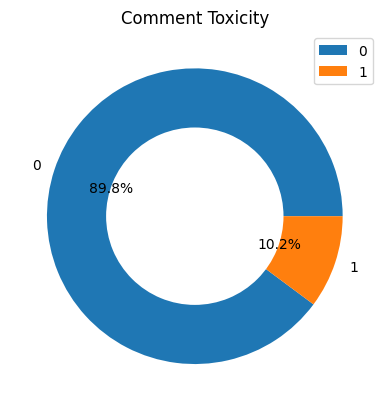

In [13]:
toxic_label=df["Toxic_Label"].value_counts().reset_index()
toxic_label
plt.pie(x=toxic_label["count"],labels=toxic_label["Toxic_Label"],autopct="%1.1f%%")
plt.title("Comment Toxicity")
plt.pie([1],colors="white",radius=0.6)
plt.legend(loc=1)
plt.show()

In [14]:
df[df["Toxic_Label"]==1]

,comment_text,Toxic_Label
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
12,Hey... what is it..\n@ | talk .\nWhat is it......,1
16,"Bye! \n\nDon't look, come or think of comming ...",1
42,You are gay or antisemmitian? \n\nArchangel WH...,1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1
...,...,...
159494,"""\n\n our previous conversation \n\nyou fuckin...",1
159514,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1
159541,Your absurd edits \n\nYour absurd edits on gre...,1
159546,"""\n\nHey listen don't you ever!!!! Delete my e...",1


In [15]:
import re
def remove_num(text):
    return re.sub(r'\d+'," ",text)

df["comment_text"]=df["comment_text"].apply(remove_num)

In [16]:
! pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import nltk
nltk.download("stopwords")
nltk.download("owm-1.4")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading owm-1.4: Package 'owm-1.4' not found in
[nltk_data]     index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
stopword=stopwords.words("english")

In [19]:
print(df["comment_text"][27])

Yes, because the mother of the child in the case against Michael Jackson was studied in here motives and reasonings and judged upon her character just as harshly as Wacko Jacko himself.  Don't tell me to ignore it and incriminate myself.  I am going to continue refuting the bullshit that Jayjg keeps throwing at me.    : ,   Jun   (UTC)


In [20]:
from nltk.tokenize import word_tokenize

In [21]:
from nltk.stem import WordNetLemmatizer
lam=WordNetLemmatizer()

In [22]:
import string
def clean_text(text):
    text=text.lower()
    text=text.translate(str.maketrans("","",string.punctuation))
    text=re.sub(r'[^a-zA-Z]'," ",text)
    words=word_tokenize(text)
    clean_word=[lam.lemmatize(word) for word in words if word not in stopword and len(word)>2]
    return clean_word

df["clean_text"]=df["comment_text"].apply(clean_text)

In [23]:
df.head()

,comment_text,Toxic_Label,clean_text
0,Explanation\nWhy the edits made under my usern...,0,"[explanation, edits, made, username, hardcore,..."
1,D'aww! He matches this background colour I'm s...,0,"[daww, match, background, colour, seemingly, s..."
2,"Hey man, I'm really not trying to edit war. It...",0,"[hey, man, really, trying, edit, war, guy, con..."
3,"""\nMore\nI can't make any real suggestions on ...",0,"[cant, make, real, suggestion, improvement, wo..."
4,"You, sir, are my hero. Any chance you remember...",0,"[sir, hero, chance, remember, page, thats]"


In [24]:
df_small=df.sample(50000,random_state=42)

In [25]:
df_small.head()

,comment_text,Toxic_Label,clean_text
119105,"Geez, are you forgetful! We've already discus...",0,"[geez, forgetful, weve, already, discussed, ma..."
131631,Carioca RFA \n\nThanks for your support on my ...,0,"[carioca, rfa, thanks, support, request, admin..."
125326,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,"[birthday, worry, enjoy, daytalke]"
111256,Pseudoscience category? \n\nI'm assuming that ...,0,"[pseudoscience, category, assuming, article, p..."
83590,"(and if such phrase exists, it would be provid...",0,"[phrase, exists, would, provided, search, engi..."


In [26]:
import gensim

In [27]:
from gensim.models import Word2Vec
model=Word2Vec(sentences=df_small["clean_text"],sg=0,min_count=1,window=5,vector_size=100,workers=4)
vector=model.wv["explanation"]
similar=model.wv.most_similar("explanation",topn=5)
print(similar)

[('objection', 0.8476799726486206), ('perfectly', 0.8404787182807922), ('reasoning', 0.8348479866981506), ('fully', 0.8303071856498718), ('justification', 0.8245360255241394)]


In [28]:
max_len=100
def sentence_vector(text,model,max_len):
    vecs=[]
    for word in text:
        if word in model.wv:
            vecs.append(model.wv[word])
        else:
            vecs.append(np.zeros(model.vector_size))
            
    if len(vecs)<max_len:
        pad_len=max_len-len(vecs)
        vecs +=[np.zeros(model.vector_size)]*pad_len
        
    vecs=vecs[:max_len]
    return np.array(vecs)
    

In [29]:

df_small["word_vector"]=df_small["clean_text"].apply(lambda x:sentence_vector(x,model,max_len))

In [30]:
df_small["word_vector"][0].shape

(100, 100)

In [31]:
lst=df_small["word_vector"].tolist
print(lst)

<bound method IndexOpsMixin.tolist of 119105    [[-0.051793068647384644, 0.07512946426868439, ...
131631    [[-0.03872155398130417, 0.020792612805962563, ...
125326    [[-0.43971535563468933, 0.4084828197956085, -0...
111256    [[0.04552176594734192, 0.27079272270202637, 0....
83590     [[1.1840457916259766, 0.07903498411178589, 0.7...
                                ...                        
115991    [[1.3931409120559692, 0.3151909112930298, 0.29...
30474     [[-0.8093130588531494, 0.8096536993980408, -0....
49523     [[0.60739225, -0.8068646, 2.0357132, -1.536499...
71905     [[-0.25261425971984863, 0.34437498450279236, 0...
52099     [[0.040067266672849655, 0.8279215097427368, 0....
Name: word_vector, Length: 50000, dtype: object>


In [32]:
X=np.stack(df_small["word_vector"].tolist())
print(X.shape)

(50000, 100, 100)


In [33]:
y=df_small.loc[:,["Toxic_Label"]]

In [34]:
! pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from sklearn.model_selection import train_test_split #type:ignore
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [36]:
! pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import Bidirectional, LSTM,Dense,Dropout  #type:ignore
from tensorflow.keras.callbacks import EarlyStopping  #type:ignore

In [38]:
Classify=Sequential()
Classify.add(Bidirectional(LSTM(64,return_sequences=False),input_shape=(100,100)))
Classify.add(Dropout(0.2))
Classify.add(Dense(units=1,activation="sigmoid"))

In [39]:
Classify.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [40]:
early_stop=EarlyStopping(monitor="val_loss",patience=2,restore_best_weights=True)
model1=Classify.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=15,callbacks=[early_stop])

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 99s 74ms/step - accuracy: 0.9277 - loss: 0.2037 - val_accuracy: 0.9535 - val_loss: 0.1339
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9522 - loss: 0.1325 - val_accuracy: 0.9544 - val_loss: 0.1279
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.9554 - loss: 0.1212 - val_accuracy: 0.9563 - val_loss: 0.1287
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.9580 - loss: 0.1160 - val_accuracy: 0.9573 - val_loss: 0.1224
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 43ms/step - accuracy: 0.9612 - loss: 0.1077 - val_accuracy: 0.9581 - val_loss: 0.1205
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.9618 - loss: 0.1048 - val_accuracy: 0.9563 - val_loss: 0.1236
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 42ms/step - accuracy: 0.9657 - loss: 0.0949 - val_accuracy: 0.9578 - val_loss: 0.1306


In [41]:
print(model1.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


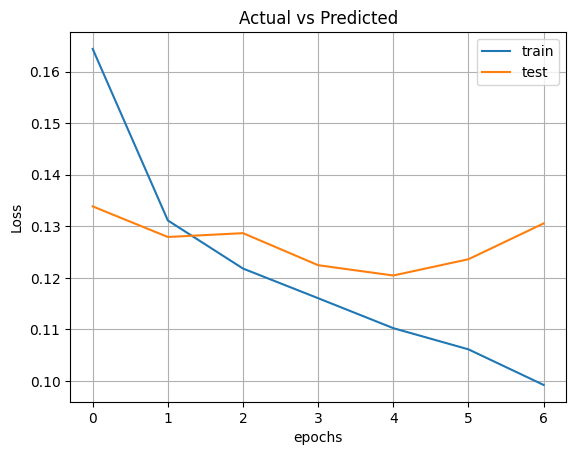

In [42]:
plt.plot(model1.history["loss"],label="train")
plt.plot(model1.history["val_loss"],label="test")
plt.title("Actual vs Predicted")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

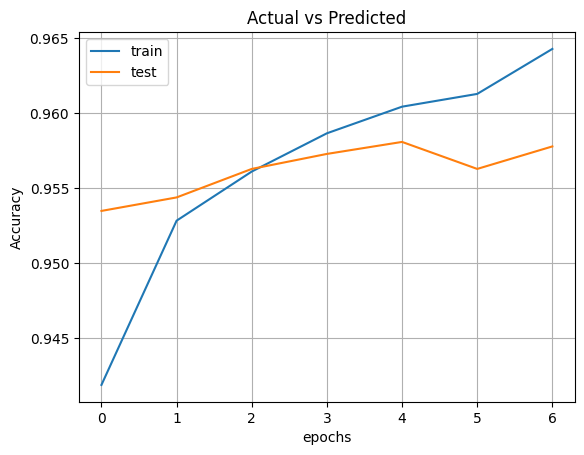

In [43]:
plt.plot(model1.history["accuracy"],label="train")
plt.plot(model1.history["val_accuracy"],label="test")
plt.title("Actual vs Predicted")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
y_pred_test=Classify.predict(x_test)
print(type(y_pred_test))
print(y_pred_test)
y_pred_test_real=(y_pred_test>0.5).astype(int)
print(y_pred_test_real)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
<class 'numpy.ndarray'>
[[0.00011706]
 [0.00134458]
 [0.00138376]
 ...
 [0.001766  ]
 [0.03295111]
 [0.0009304 ]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [45]:
y_pred_train=Classify.predict(x_train)
y_pred_train_real=(y_pred_train>0.5).astype(int)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step


In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test_real))
print(accuracy_score(y_train,y_pred_train_real))

0.9581
0.964075


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test_real))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9011
           1       0.86      0.68      0.76       989

    accuracy                           0.96     10000
   macro avg       0.91      0.84      0.87     10000
weighted avg       0.96      0.96      0.96     10000



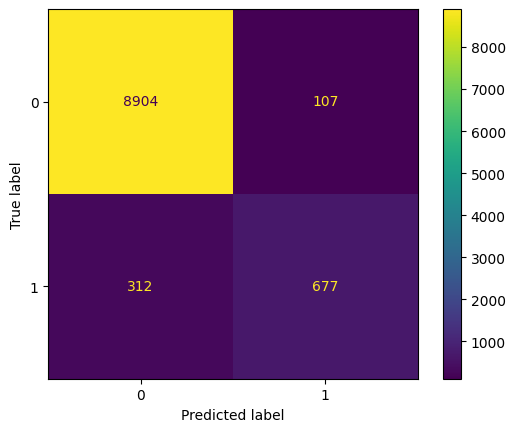

In [48]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_test_real)
ConfusionMatrixDisplay(cm).plot()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


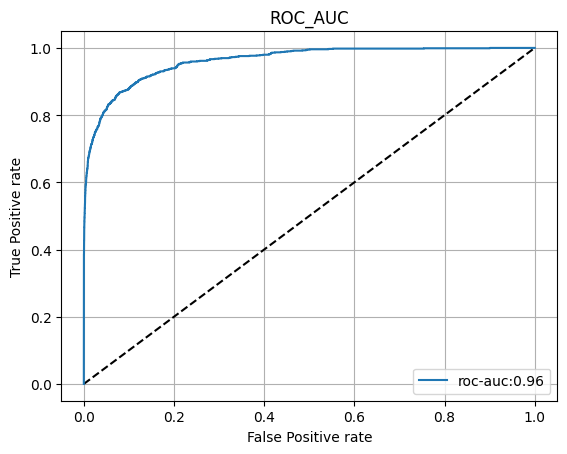

In [49]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob=Classify.predict(x_test)

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],linestyle="dashed",color="black")
plt.plot(fpr,tpr,label=f"roc-auc:{round(roc_auc_score(y_test,y_pred_prob),2)}")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC_AUC")
plt.grid(True)
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import precision_score
Precision_score=precision_score(y_test,y_pred_test_real)
print(Precision_score)

0.8635204081632653


In [51]:
from sklearn.metrics import recall_score
Recall_score=recall_score(y_test,y_pred_test_real)
print(Recall_score)

0.6845298281092013


In [52]:
from sklearn.metrics import f1_score
F1_score=f1_score(y_test,y_pred_test_real)
print(F1_score)

0.763677382966723
